# Monte Carlo Integration

Let's compute the area under the function $f(x)=x^{3/4}$ for $0<x<2$.  First, let's plot the function.

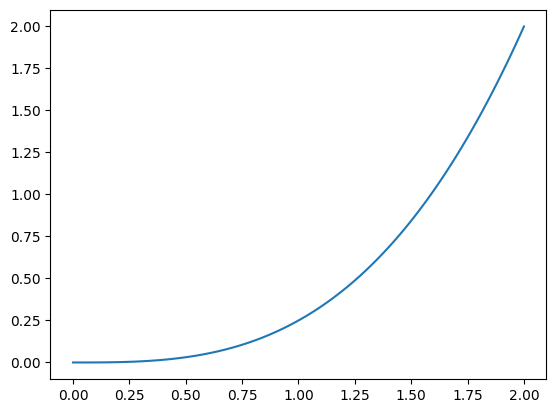

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3/4;

x = np.linspace(0, 2, 100)
fx = f(x)
p = plt.plot(x, fx)

## Numerical integration

- Rectangle rule

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Integration_rectangle.svg/640px-Integration_rectangle.svg.png)

$$A = \sum_i f(x_i)\Delta x$$

- Trapezoidal rule:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Integration_trapezoid.svg/640px-Integration_trapezoid.svg.png)

- See: https://en.wikipedia.org/wiki/Numerical_integration

Now, let's compute the area using the trapezoid rule.



In [2]:
area = round(np.trapz(fx, x), 2)
print("The area is:", area)

The area is: 1.0


## Monte Carlo Integration: Sampling Method

Area for n=10 is 1.318602603921946
Area for n=100 is 0.8993031190853784


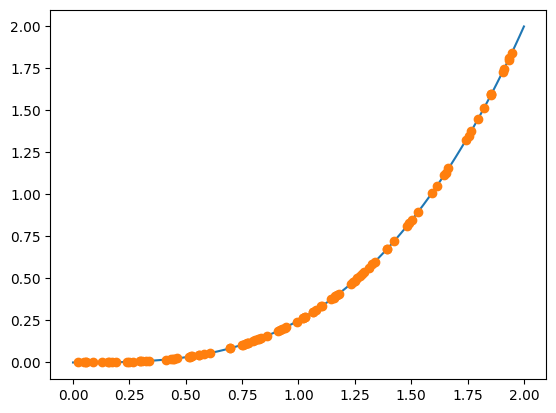

In [3]:
def make_sample(a, b, n=10):
    """
    a, b: interval
    n: sample size
    """
    return np.random.rand(n)*(b - a) + a

def evaluate_sample(m):
    """
    m: sample (array)
    """
    return f(m)

(a, b) = (0, 2)
t_samples = [10, 100]
for t in t_samples:
    x_m = make_sample(a, b, t)
    f_m = evaluate_sample(x_m)
    area = (b-a)*sum(f_m)/t
    print("Area for n="+str(t), "is", area)

plt.plot(x, fx)
p = plt.plot(x_m, f_m, 'o')

**Assignment 1**: What is the number of samples required for this method to guarantee a precision of $10^{-3}$ in 10 succesive executions?

In [4]:
## WRITE YOUR CODE HERE
import statsmodels.stats.api as sms

# Parámetros
alpha = 0.05  # Nivel de confianza (95% en este caso)
sigma =  # Desviación estándar de la población (debes proporcionar este valor)
effect_size = 10**-3  # Tamaño del efecto deseado (precisión)

# Calcula el tamaño de muestra
n = sms.zt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.9, alternative='two-sided')

# Multiplica el tamaño de muestra por 10 para las 10 ejecuciones sucesivas
n_total = n * 10

print(f"Tamaño de muestra necesario por ejecución: {n}")
print(f"Tamaño de muestra total para 10 ejecuciones sucesivas: {n_total}")
## --------------------

## Monte Carlo Integration: Hit and Miss Method

- The square $\{a-b, 0-c\}$ contains the curve under which we want to calculate the area. So, we can generate random points $x_r$ and $y_r$ at the limits of $X:a,b$ and $Y:0,c$, respectively.  Then, we check if this point $(x_r, y_r)$ is within the area of interest (*i.e.*, below the curve).

Area for n=10 is 0.8
Area for n=100 is 1.0


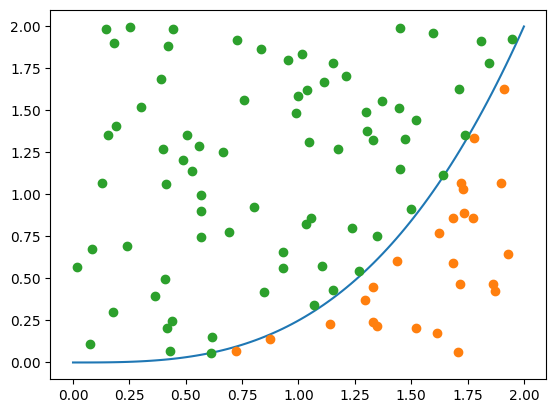

In [5]:
def hit_and_miss(a, b, c, n):
    x_in, x_out = [], []
    y_in, y_out = [], []
    for i in range(n):
        x_r = make_sample(a, b, 1)
        y_r = make_sample(0, c, 1)
        if y_r < f(x_r):
            x_in += [x_r]
            y_in += [y_r]
        else:
            x_out += [x_r]
            y_out += [y_r]
    return x_in, y_in, x_out, y_out

(a, b, c) = (0, 2, 2)
t_samples = [10, 100]
square_area = (b-a)*c
for t in t_samples:
    points = hit_and_miss(a, b, c, t)
    area = len(points[0])/t * square_area
    print("Area for n="+str(t), "is", area)

plt.plot(x, fx)
plt.plot(points[0], points[1], 'o')
p = plt.plot(points[2], points[3], 'o')

**Assignment 2**: What is the number of samples required for this method to guarantee a precision of $10^{-3}$ in 10 succesive executions?

In [6]:
## WRITE YOUR CODE HERE

## --------------------

## Inverse transform sampling

The main distributions have been implemented as a function in many programming languages. But if we need to model stochastic processes that do not follow any of the common distributions, we can generate random values using the method known as *Universality of the Uniform* $$X=F^{-1}(U)$$

If we evaluate a uniform distribution in the inverse of the accumulated $F^{−1}$, we obtain a random variable with cdf $F$.  For instance:
- pdf $\Rightarrow x^{3/4}$
- cdf $\Rightarrow \int_{0}^x t^{3/4}dt = x^4/16$
- Inverse cdf $\Rightarrow u=x^4/16 \Rightarrow x=(16u)^{1/4} = 2u^{1/4}$



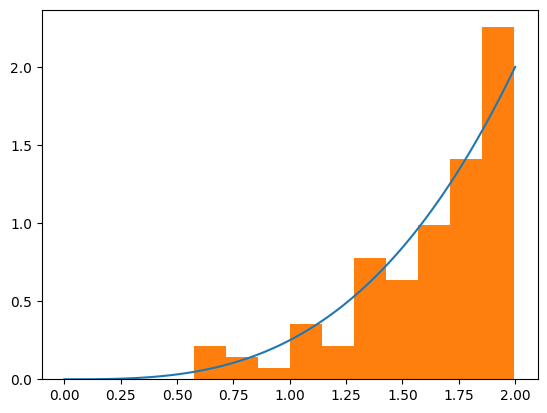

In [7]:
def Finv(n):
    u = np.random.rand(n)
    return 2*u**(1/4)

n = 100
x_rvs = Finv(n)
plt.plot(x, fx)
h = plt.hist(x_rvs, density=True)

**Assignment 3**: How is the previous behavior with $n\in[1000, 10000]$?

In [8]:
## WRITE YOUR CODE HERE

##---------------------

What happens if it is not possible to calculate the inverse or it is not trivial to calculate it?  We can use the reject method, which is very similar to the hit and miss method.

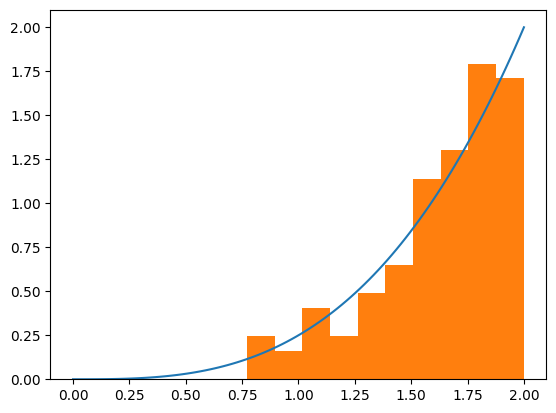

In [9]:
n = 100
(a, b, c) = (0, 2, 2)
x_rvs = []
i = 0
while i < n:
    x_r = a + (b - a)*np.random.rand()
    y_r = c * np.random.rand()
    if y_r < f(x_r):
        x_rvs += [x_r]
        i += 1

plt.plot(x, fx)
h = plt.hist(x_rvs, density=True)

## Exercises

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/MonteCarloIntegrationCircle.svg/220px-MonteCarloIntegrationCircle.svg.png)

**Assignment 4**: Compute the area inside the cicle using Monte Carlo integration: the hit and miss method.

In [10]:
## WRITE YOUR CODE HERE

##---------------------

**Assignment 5**: Compute the same area (*i.e.*, inside the circle) using Monte Carlo integration: the sampling method.

In [11]:
## WRITE YOUR CODE HERE

##---------------------

**Assignment 6**: Generate 10000 random numbers that correspond to a PDF given by $$f(x)=\begin{cases} x/2, & 0\le x\le 2\\ 0, & elsewhere \end{cases}$$ Prove your implementation generating the histogram for those numbers.

In [12]:
## WRITE YOUR CODE HERE

## --------------------